In [15]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def display_wosac_table(data_dir):
    csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
    
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in {data_dir}")
    
    most_recent_file = max(csv_files, key=os.path.getctime)
    print(f"Using file: {most_recent_file}")
    
    df = pd.read_csv(most_recent_file)
    df = df.set_index("AGENT POLICY")
    
    def highlight_best(df):
        styles = pd.DataFrame('', index=df.index, columns=df.columns)
        
        higher_better_cols = [col for col in df.columns if '(↑)' in col]
        lower_better_cols = [col for col in df.columns if '(↓)' in col]
        
        for col in higher_better_cols:
            max_val = df[col].max()
            max_indices = df[col] == max_val
            styles.loc[max_indices, col] = 'background-color: #a8f0a8'
        
        for col in lower_better_cols:
            min_val = df[col].min()
            min_indices = df[col] == min_val
            styles.loc[min_indices, col] = 'background-color: #a8f0a8'
        
        return styles
    
    styled_df = df.style.apply(highlight_best, axis=None).format(precision=3)
    
    return styled_df

def create_radar_chart(data_dir='examples/eval/figures_data'):
    csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
    
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in {data_dir}")
    
    most_recent_file = max(csv_files, key=os.path.getctime)
    df = pd.read_csv(most_recent_file)
    df = df.set_index("AGENT POLICY")
    
    key_metrics = [
        "COMPOSITE METRIC (↑)", 
        "LINEAR SPEED (↑)", 
        "ANG. SPEED (↑)",
        "COLLISION (↑)",
        "TTC (↑)", 
        "OFFROAD (↑)"
    ]
    
    radar_df = df[key_metrics].copy()
    for col in radar_df.columns:
        if '(↑)' in col:
            radar_df[col] = (radar_df[col] - radar_df[col].min()) / (radar_df[col].max() - radar_df[col].min())
        else:
            radar_df[col] = 1 - ((radar_df[col] - radar_df[col].min()) / (radar_df[col].max() - radar_df[col].min()))
    
    categories = [col.replace(' (↑)', '').replace(' (↓)', '') for col in key_metrics]
    N = len(categories)
    
    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    top_policies = df.sort_values("COMPOSITE METRIC (↑)", ascending=False).head(5).index
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_policies)))
    
    for i, policy in enumerate(top_policies):
        values = radar_df.loc[policy].values.flatten().tolist()
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=policy)
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    plt.xticks(angles[:-1], categories, size=12)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Key Metrics Comparison (Normalized)', size=15, y=1.1)
    
    return fig

In [20]:
table = display_wosac_table()
display(table);

TypeError: display_wosac_table() missing 1 required positional argument: 'data_dir'

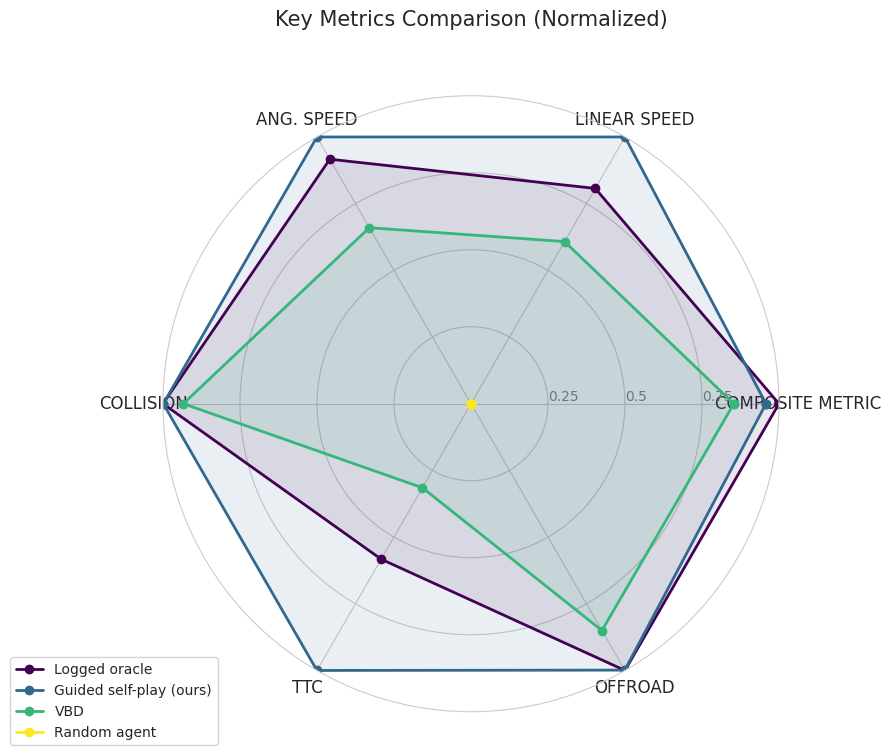

In [21]:
radar_fig = create_radar_chart(data_dir='/home/emerge/gpudrive/examples/eval/figures_data')
plt.show()
